Epoch 0: Loss=151.9658, w=1.554, b=-0.504
Epoch 100: Loss=2.3479, w=2.146, b=-0.070
Epoch 200: Loss=2.3040, w=2.115, b=0.135
Epoch 300: Loss=2.2880, w=2.097, b=0.258
Epoch 400: Loss=2.2822, w=2.086, b=0.332
Epoch 500: Loss=2.2801, w=2.079, b=0.377
Epoch 600: Loss=2.2793, w=2.075, b=0.404
Epoch 700: Loss=2.2790, w=2.073, b=0.421
Epoch 800: Loss=2.2789, w=2.071, b=0.430
Epoch 900: Loss=2.2789, w=2.070, b=0.436


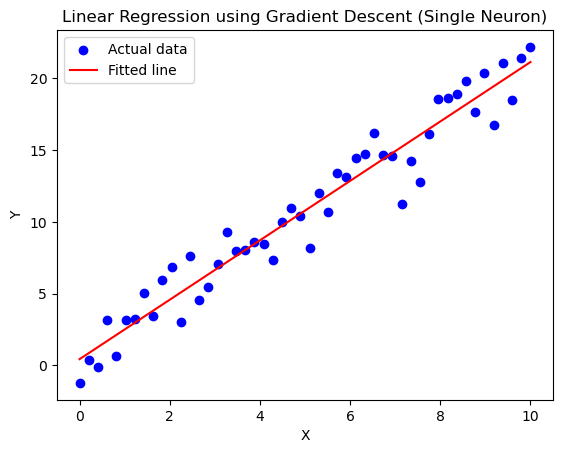


Final Model: y = 2.070x + 0.440


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Generate sample data
# -------------------------------
# True relationship: y = 2x + 1 (we'll try to learn this)
X = np.linspace(0, 10, 50)
Y = 2 * X + 1 + np.random.randn(50) * 1.5  # add some noise

# -------------------------------
# Step 2: Initialize parameters
# -------------------------------
w = np.random.randn()  # random weight
b = np.random.randn()  # random bias
lr = 0.01              # learning rate
epochs = 1000          # number of iterations

# -------------------------------
# Step 3: Training using gradient descent
# -------------------------------
n = len(X)
for epoch in range(epochs):
    # Predicted output
    Y_pred = w * X + b
    
    # Compute loss (Mean Squared Error)
    loss = (1/n) * np.sum((Y - Y_pred)**2)
    
    # Compute gradients
    dw = (-2/n) * np.sum(X * (Y - Y_pred))
    db = (-2/n) * np.sum(Y - Y_pred)
    
    # Update parameters
    w -= lr * dw
    b -= lr * db
    
    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss={loss:.4f}, w={w:.3f}, b={b:.3f}")

# -------------------------------
# Step 4: Plot results
# -------------------------------
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, w * X + b, color='red', label='Fitted line')
plt.title("Linear Regression using Gradient Descent (Single Neuron)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print(f"\nFinal Model: y = {w:.3f}x + {b:.3f}")


Predict house prices (MEDV) based on one real feature — say, the average number of rooms per dwelling (RM).

In [2]:
# Linear Regression using Gradient Descent (Single Neuron Perceptron)
# Dataset: Boston Housing (Feature: RM, Target: MEDV)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Step 1: Load and prepare dataset
# -------------------------------
boston = load_boston()
X = boston.data[:, 5].reshape(-1, 1)  # 'RM' - average number of rooms per dwelling
Y = boston.target.reshape(-1, 1)      # 'MEDV' - Median value of homes

# Normalize data (important for gradient descent stability)
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# -------------------------------
# Step 2: Initialize parameters
# -------------------------------
w = np.random.randn()  # weight
b = np.random.randn()  # bias
lr = 0.01              # learning rate
epochs = 1000
n = len(X_train)

# -------------------------------
# Step 3: Gradient Descent Training
# -------------------------------
loss_history = []

for epoch in range(epochs):
    # Predictions
    Y_pred = w * X_train + b
    
    # Compute loss (MSE)
    loss = (1/n) * np.sum((Y_train - Y_pred)**2)
    loss_history.append(loss)
    
    # Compute gradients
    dw = (-2/n) * np.sum(X_train * (Y_train - Y_pred))
    db = (-2/n) * np.sum(Y_train - Y_pred)
    
    # Update parameters
    w -= lr * dw
    b -= lr * db
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss={loss:.4f}, w={w:.3f}, b={b:.3f}")

# -------------------------------
# Step 4: Evaluate model
# -------------------------------
Y_pred_test = w * X_test + b
test_loss = (1/len(X_test)) * np.sum((Y_test - Y_pred_test)**2)

print(f"\nFinal Test Loss (MSE): {test_loss:.4f}")
print(f"Learned parameters: w = {w:.3f}, b = {b:.3f}")

# -------------------------------
# Step 5: Plot Results
# -------------------------------
plt.figure(figsize=(8, 5))
plt.scatter(X_test, Y_test, color='blue', label='Actual prices')
plt.plot(X_test, Y_pred_test, color='red', label='Predicted line')
plt.title("Linear Regression using Gradient Descent (Boston Housing - RM vs MEDV)")
plt.xlabel("Average Number of Rooms (Standardized)")
plt.ylabel("Median Home Price (Standardized)")
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Epoch 0: Loss=2.9383, w=-0.099, b=1.304
Epoch 100: Loss=0.5681, w=0.585, b=0.173
Epoch 200: Loss=0.5258, w=0.676, b=0.023
Epoch 300: Loss=0.5251, w=0.688, b=0.002
Epoch 400: Loss=0.5251, w=0.690, b=-0.000
Epoch 500: Loss=0.5251, w=0.690, b=-0.001
Epoch 600: Loss=0.5251, w=0.690, b=-0.001
Epoch 700: Loss=0.5251, w=0.690, b=-0.001
Epoch 800: Loss=0.5251, w=0.690, b=-0.001
Epoch 900: Loss=0.5251, w=0.690, b=-0.001

Final Test Loss (MSE): 0.5325
Learned parameters: w = 0.690, b = -0.001


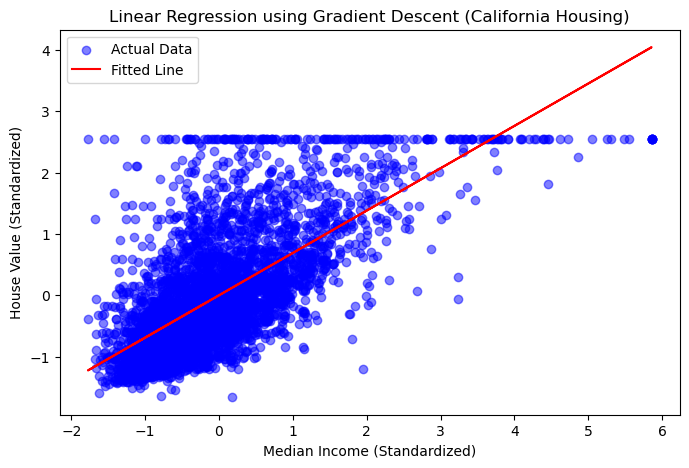

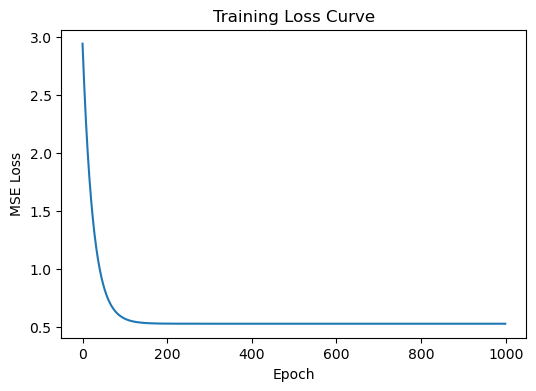

In [3]:
# Linear Regression using Gradient Descent (Single Neuron Perceptron)
# Dataset: California Housing (Feature: MedInc, Target: House Value)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Step 1: Load dataset
# -------------------------------
data = fetch_california_housing()
X = data.data[:, 0].reshape(-1, 1)  # 'MedInc' (Median income)
Y = data.target.reshape(-1, 1)      # 'MedHouseVal' (Median house value)

# -------------------------------
# Step 2: Standardize data
# -------------------------------
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# -------------------------------
# Step 3: Initialize parameters
# -------------------------------
w = np.random.randn()
b = np.random.randn()
lr = 0.01
epochs = 1000
n = len(X_train)

loss_history = []

# -------------------------------
# Step 4: Gradient Descent Training
# -------------------------------
for epoch in range(epochs):
    # Forward pass
    Y_pred = w * X_train + b
    
    # Compute Mean Squared Error
    loss = (1/n) * np.sum((Y_train - Y_pred)**2)
    loss_history.append(loss)
    
    # Gradients
    dw = (-2/n) * np.sum(X_train * (Y_train - Y_pred))
    db = (-2/n) * np.sum(Y_train - Y_pred)
    
    # Update parameters
    w -= lr * dw
    b -= lr * db
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss={loss:.4f}, w={w:.3f}, b={b:.3f}")

# -------------------------------
# Step 5: Evaluate Model
# -------------------------------
Y_pred_test = w * X_test + b
test_loss = (1/len(X_test)) * np.sum((Y_test - Y_pred_test)**2)

print(f"\nFinal Test Loss (MSE): {test_loss:.4f}")
print(f"Learned parameters: w = {w:.3f}, b = {b:.3f}")

# -------------------------------
# Step 6: Visualization
# -------------------------------
plt.figure(figsize=(8, 5))
plt.scatter(X_test, Y_test, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_test, Y_pred_test, color='red', label='Fitted Line')
plt.title("Linear Regression using Gradient Descent (California Housing)")
plt.xlabel("Median Income (Standardized)")
plt.ylabel("House Value (Standardized)")
plt.legend()
plt.show()

# Plot loss curve
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()
